In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv')
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [3]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [4]:
df['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

## Train Test Split

In [5]:
df = df.sample(frac=1)

In [6]:
x_train = df.iloc[:8000].drop(columns=['name'])
y_train = df.iloc[:8000]['name']
x_test = df.iloc[8000:].drop(columns=['name'])
y_test = df.iloc[8000:]['name']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


## 전처리

In [7]:
x_train_z_scaler = {
    'diameter':{
        'mean': x_train['diameter'].mean(),
        'std': x_train['diameter'].std()
    },
    'weight':{
        'mean': x_train['weight'].mean(),
        'std': x_train['weight'].std()
    },
    'red':{
        'mean': x_train['red'].mean(),
        'std': x_train['red'].std()
    },
    'green':{
        'mean': x_train['green'].mean(),
        'std': x_train['green'].std()
    },
    'blue':{
        'mean': x_train['blue'].mean(),
        'std': x_train['blue'].std()
    },
}

In [8]:
x_train['diameter'] = (x_train['diameter'] - x_train['diameter'].mean()) / x_train['diameter'].std()
x_train['weight'] = (x_train['weight'] - x_train['weight'].mean()) / x_train['weight'].std()
x_train['red'] = (x_train['red'] - x_train['red'].mean()) / x_train['red'].std()
x_train['blue'] = (x_train['blue'] - x_train['blue'].mean()) / x_train['blue'].std()
x_train['green'] = (x_train['green'] - x_train['green'].mean()) / x_train['green'].std()

x_train

,diameter,weight,red,green,blue
1304,-1.173836,-1.176255,-0.088566,0.431158,-1.030138
5608,0.032368,-0.008378,1.541995,-0.338595,-0.475540
602,-1.534667,-1.498049,0.295096,1.371966,0.189978
2746,-0.684138,-0.691502,0.774672,1.543022,-1.030138
5993,0.243711,0.205464,-0.951804,0.431158,2.630210
...,...,...,...,...,...
4767,0.336496,0.308259,0.295096,0.260101,0.189978
3325,-0.493414,-0.487286,1.062418,1.628550,-1.030138
2519,-0.761459,-0.758886,1.637910,0.773270,-0.808299
9389,1.527236,1.536301,-1.047719,-1.621516,-1.030138


In [9]:
y_train = y_train.map({'grapefruit': 0, 'orange': 1})

In [10]:
x_train = x_train.values
y_train = y_train.values

In [11]:
x_test['diameter'] = (x_test['diameter'] - x_train_z_scaler['diameter']['mean']) / x_train_z_scaler['diameter']['std']
x_test['weight'] = (x_test['weight'] - x_train_z_scaler['weight']['mean']) / x_train_z_scaler['weight']['std']
x_test['red'] = (x_test['red'] - x_train_z_scaler['red']['mean']) / x_train_z_scaler['red']['std']
x_test['blue'] = (x_test['blue'] - x_train_z_scaler['blue']['mean']) / x_train_z_scaler['blue']['std']
x_test['green'] = (x_test['green'] - x_train_z_scaler['green']['mean']) / x_train_z_scaler['green']['std']

x_test

,diameter,weight,red,green,blue
3635,-0.385164,-0.375209,-1.431380,0.602214,-0.697379
9820,1.918995,1.955733,0.391011,-1.108347,-0.253701
8536,1.125168,1.130277,-1.527296,0.089045,-0.697379
1587,-1.070742,-1.064865,0.295096,0.431158,-1.030138
4674,0.212783,0.206495,1.637910,2.483831,-0.808299
...,...,...,...,...,...
3523,-0.431557,-0.419215,-0.568142,0.602214,0.522737
2472,-0.776923,-0.773669,-1.143634,0.174573,-0.031862
9272,1.449915,1.466166,0.295096,-1.022819,1.077335
2425,-0.792387,-0.787765,1.062418,-1.450459,-0.364621


In [12]:
y_test = y_test.map({'grapefruit': 0, 'orange': 1})
y_test

3635    1
9820    0
8536    0
1587    1
4674    1
       ..
3523    1
2472    1
9272    0
2425    1
1165    1
Name: name, Length: 2000, dtype: int64

## KNN

In [13]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(x_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('precision score: ', precision_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))


accuracy score:  0.9235
precision score:  0.9180327868852459
recall score:  0.9246646026831785
f1 score:  0.9213367609254499


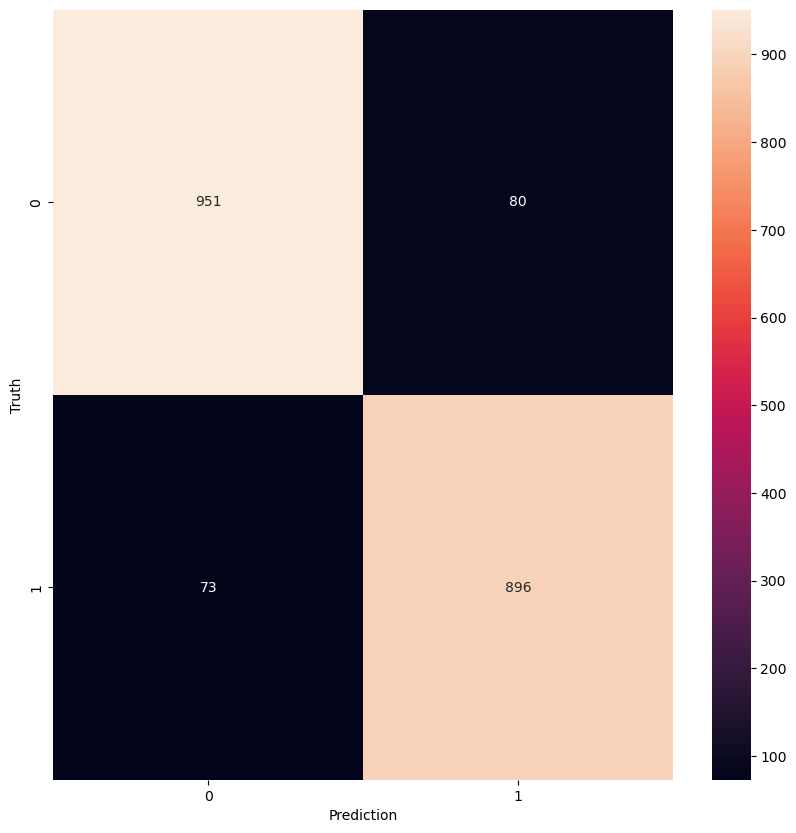

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()